Install tflite model maker

In [ ]:
# q is for quiet (Hide details if requirement already satisfied)
!pip install -q tflite-model-maker
!pip install -q tflite-support

     |████████████████████████████████| 616 kB 4.3 MB/s 
     |████████████████████████████████| 6.4 MB 46.8 MB/s 
     |████████████████████████████████| 87 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 120 kB 53.2 MB/s 
     |████████████████████████████████| 840 kB 52.4 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 3.4 MB 41.5 MB/s 
     |████████████████████████████████| 1.1 MB 40.1 MB/s 
     |████████████████████████████████| 213 kB 50.6 MB/s 
     |████████████████████████████████| 25.3 MB 56.6 MB/s 
     |████████████████████████████████| 99 kB 8.9 MB/s 
     |████████████████████████████████| 352 kB 49.4 MB/s 
     |████████████████████████████████| 47.7 MB 99 kB/s 
     |████████████████████████████████| 210 kB 50.8 MB/s 


Import required packages


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from tflite_support import metadata
import tensorflow as tf

# tf.get_logger().setLevel('ERROR')
# from absl import logging
# logging.set_verbosity(logging.ERROR)

Get the contents of google drive to this notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the directory to the folder containing images

In [ ]:
os.chdir('/content/drive/MyDrive/bat_images')

Load the data that are stored in Pascal VOC (Visual Object Classes) format. Pascal VOC is an XML (Extensible Markup Language) file which is created for each of the image. Pascal VOC stores the bounding boxes as (xmin, ymin, xmax, ymax)

In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc(
    images_dir='train',
    annotations_dir='train',
    label_map={1: "bat"}
)

val_data = object_detector.DataLoader.from_pascal_voc(
    images_dir='test',
    annotations_dir='test',
    label_map={1: "bat"}
)

INFO:tensorflow:Cache will be stored in /tmp/tmptghlbgrn with prefix filename 7bee435cfee6949ada7cad38d32e815e. Cache_prefix is /tmp/tmptghlbgrn/7bee435cfee6949ada7cad38d32e815e
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:Cache will be stored in /tmp/tmp3odxcdx6 with prefix filename fd42585a6188df7d3abc4e516ad0ebb5. Cache_prefix is /tmp/tmp3odxcdx6/fd42585a6188df7d3abc4e516ad0ebb5
INFO:tensorflow:On image 0


Choose the model architecture

In [ ]:
model_arch = model_spec.get('efficientdet_lite0')

Train the model

In [ ]:
BATCH_SIZE = 4
EPOCHS = 100

model = object_detector.create(train_data,
                               model_spec=model_arch,
                               batch_size=BATCH_SIZE,
                               # Fine tune the whole model instead of just training the top layer
                               train_whole_model=True,
                               epochs=EPOCHS,
                               validation_data=val_data)

INFO:tensorflow:Retraining the models...
Epoch 1/100
 6/43 [===>..........................] - ETA: 10s - det_loss: 1.8805 - cls_loss: 1.1387 - box_loss: 0.0148 - reg_l2_loss: 0.0630 - loss: 1.9435 - learning_rate: 0.0078 - gradient_norm: 2.4824WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2897s vs `on_train_batch_end` time: 0.2964s). Check your callbacks.


43/43 [==============================] - 64s 439ms/step - det_loss: 1.6112 - cls_loss: 0.9493 - box_loss: 0.0132 - reg_l2_loss: 0.0630 - loss: 1.6742 - learning_rate: 0.0065 - gradient_norm: 3.2657 - val_det_loss: 1.3856 - val_cls_loss: 0.7273 - val_box_loss: 0.0132 - val_reg_l2_loss: 0.0630 - val_loss: 1.4486
Epoch 2/100
43/43 [==============================] - 16s 363ms/step - det_loss: 1.3606 - cls_loss: 0.6656 - box_loss: 0.0139 - reg_l2_loss: 0.0630 - loss: 1.4236 - learning_rate: 0.0050 - gradient_norm: 6.2142 - val_det_loss: 1.2504 - val_cls_loss: 0.6355 - val_box_loss: 0.0123 - val_reg_l2_loss: 0.0631 - val_loss: 1.3135
Epoch 3/100
43/43 [==============================] - 15s 359ms/step - det_loss: 1.1062 - cls_loss: 0.5580 - box_loss: 0.0110 - reg_l2_loss: 0.0631 - loss: 1.1693 - learning_rate: 0.0050 - gradient_norm: 6.1962 - val_det_loss: 1.1918 - val_cls_loss: 0.6517 - val_box_loss: 0.0108 - val_reg_l2_loss: 0.0631 - val_loss: 1.2549
Epoch 4/100
43/43 [=====================

In [ ]:
model.evaluate(val_data)

1/1 [==============================] - 6s 6s/step

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(2000, 7)
0/2000
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.812
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.381
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.402
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.396
 Average Recall     (AR) @[ IoU=0.50:0.95 | ar

{'AP': 0.4053988,
 'AP50': 0.811736,
 'AP75': 0.38055095,
 'AP_/bat': 0.4053988,
 'APl': 0.40224618,
 'APm': 0.557009,
 'APs': 0.0034482758,
 'ARl': 0.5625,
 'ARm': 0.65,
 'ARmax1': 0.39565217,
 'ARmax10': 0.54347825,
 'ARmax100': 0.56956524,
 'ARs': 0.2}

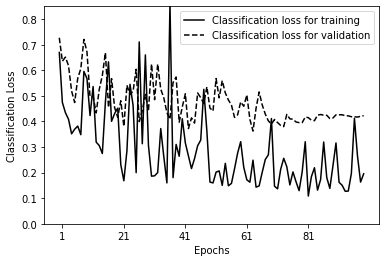

In [ ]:
import matplotlib.pyplot as plt

class_loss = model.model.history.history['cls_loss']
val_class_loss = model.model.history.history['val_cls_loss']

plt.plot(class_loss, label='Classification loss for training', color='black')
plt.plot(val_class_loss, label = 'Classification loss for validation', linestyle='dashed', color='black')
plt.xlabel('Epochs')
plt.ylabel('Classification Loss')
plt.ylim([0, 0.85])
plt.xticks(list(range(1, EPOCHS+1, 20)))
plt.legend(loc='upper right')
plt.savefig('/content/cls_loss.jpg', bbox_inches='tight')
plt.show()

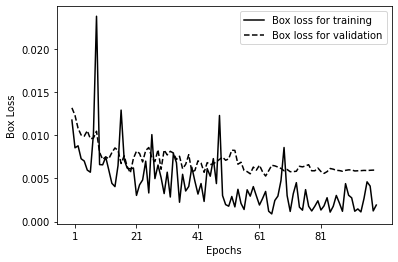

In [ ]:
box_loss = model.model.history.history['box_loss']
val_box_loss = model.model.history.history['val_box_loss']

plt.plot(box_loss, label='Box loss for training', color='black')
plt.plot(val_box_loss, label = 'Box loss for validation', linestyle='dashed', color='black')
plt.xlabel('Epochs')
plt.ylabel('Box Loss')
# plt.ylim([0, 0.85])
plt.xticks(list(range(1, EPOCHS+1, 20)))
plt.legend(loc='upper right')
plt.savefig('/content/box_loss.jpg', bbox_inches = 'tight')
plt.show()

In [ ]:
model.export(export_dir='/content/', tflite_filename='bat_100.tflite')

INFO:tensorflow:Assets written to: /tmp/tmptv60l1wq/assets


INFO:tensorflow:Assets written to: /tmp/tmptv60l1wq/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp6okh2lrn/labelmap.txt.


INFO:tensorflow:Saving labels in /tmp/tmp6okh2lrn/labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/bat_100.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/bat_100.tflite


In [ ]:
import os

os.chdir('/content')

In [ ]:
model.evaluate_tflite('/content/bat_100.tflite', val_data)

20/20 [==============================] - 45s 2s/step

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(500, 7)
0/500
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.834
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.546
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.409
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.426
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

{'AP': 0.40675595,
 'AP50': 0.8342718,
 'AP75': 0.2633477,
 'AP_/bat': 0.40675595,
 'APl': 0.4087138,
 'APm': 0.5462447,
 'APs': 0.0,
 'ARl': 0.5125,
 'ARm': 0.5833333,
 'ARmax1': 0.42608696,
 'ARmax10': 0.5043478,
 'ARmax100': 0.50869566,
 'ARs': 0.0}

In [ ]:
# Download the TFLite model

from google.colab import files
files.download('bat_100.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Latest version has some errors

!pip install opencv-python-headless==4.1.2.30